# Mouse skull 3D atlas v00
In this notebook we run registration for mouse data with skull, MD816.  Here we just look at 3D datasets.


Note atlas MRI is 50,50,50 micron

We will map to CCF which is 50,50,50.



In [1]:
%matplotlib notebook
import numpy as np
import torch
import matplotlib.pyplot as plt
import emlddmm
import json
import nrrd
import os


# for debugging only
import imp
imp.reload(emlddmm)

<module 'emlddmm' from '/mnt/data/csh_data/emlddmm/emlddmm.py'>

In [2]:
atlas_name = '/home/dtward/data/csh_data/mr_ct_may_2021/HR_NIHxCSHL_50um_14T_M1_masked.vtk'
target_name = '/home/dtward/data/AllenInstitute/allen_vtk/average_template_50.vtk'


config_file = 'configMD816_MR_to_CCF.json'
output_dir = 'MD816_test_CCF_00/'

In [3]:
with open(config_file) as f:
    config = json.load(f)
# I'm getting this for initial downsampling for preprocessing
downIs = config['downI']
downJs = config['downJ']

In [4]:
# atlas
imp.reload(emlddmm)
xI,I,title,names = emlddmm.read_data(atlas_name)
I = I.astype(float)
# normalize
I /= np.mean(np.abs(I))
dI = np.array([x[1]-x[0] for x in xI])
print(dI)
fig = emlddmm.draw(I,xI)
fig[0].suptitle('Atlas image')


Found extension .vtk
[50. 50. 50.]


<IPython.core.display.Javascript object>

Text(0.5, 0.98, 'Atlas image')

In [5]:
fig,ax = plt.subplots()
ax.hist(I.ravel(),bins=100,log=True)
ax.set_title('Atlas pixel intensities')

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Atlas pixel intensities')

In [6]:
# initial downsampling so there isn't so much on the gpu
mindownI = np.min(np.array(downIs),0)
xI,I = emlddmm.downsample_image_domain(xI,I,mindownI)
downIs = [ list((np.array(d)/mindownI).astype(int)) for d in downIs]
dI = [x[1]-x[0] for x in xI]
print(dI)
nI = np.array(I.shape,dtype=int)
# update our config variable
config['downI'] = downIs

[100.0, 100.0, 100.0]


<IPython.core.display.Javascript object>


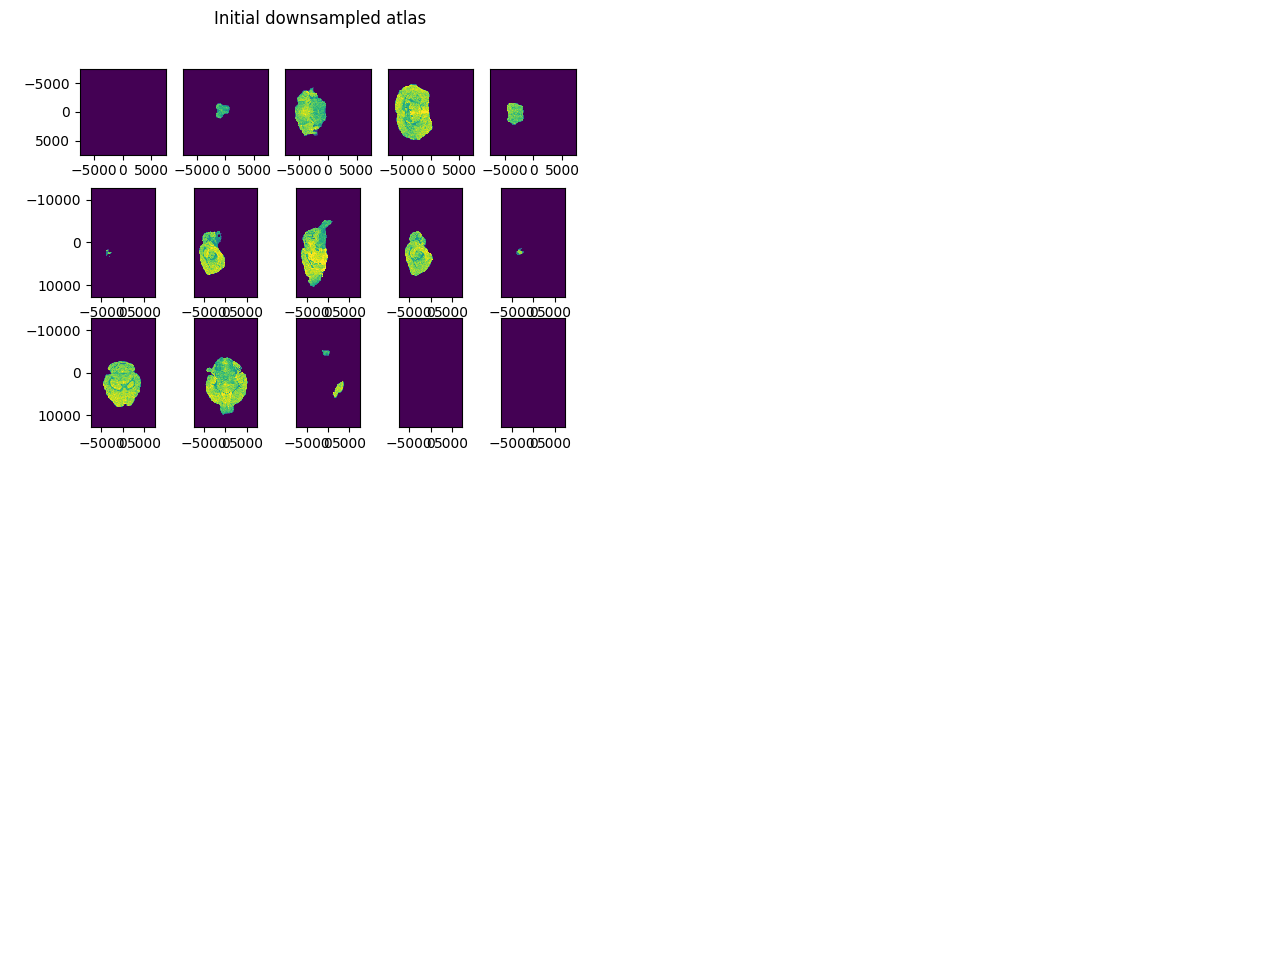

In [7]:
fig = emlddmm.draw(I,xI)
fig[0].suptitle('Initial downsampled atlas')
fig[0].canvas.draw()

Found extension .vtk
[50. 50. 50.]


<IPython.core.display.Javascript object>


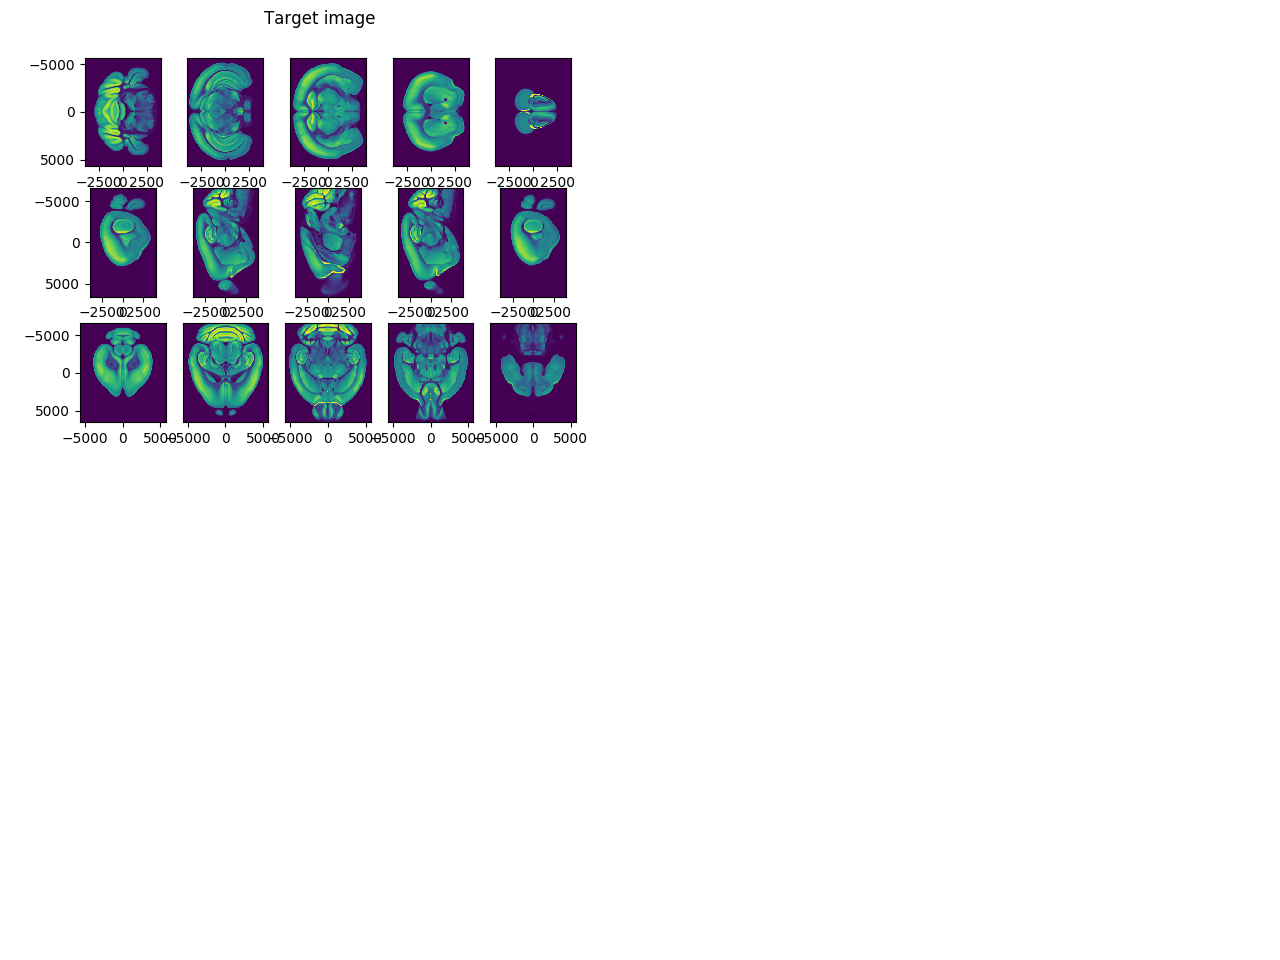

In [8]:
# target
imp.reload(emlddmm)
xJ,J,title,names = emlddmm.read_data(target_name)
J = J.astype(float)
J /= np.mean(np.abs(J))
xJ = [x for x in xJ]
dJ = np.array([x[1]-x[0] for x in xJ])
print(dJ)
J = J.astype(float)#**0.25
fig = emlddmm.draw(J,xJ)
fig[0].suptitle('Target image')
fig[0].canvas.draw()
W0 = np.ones_like(J[0])


<IPython.core.display.Javascript object>


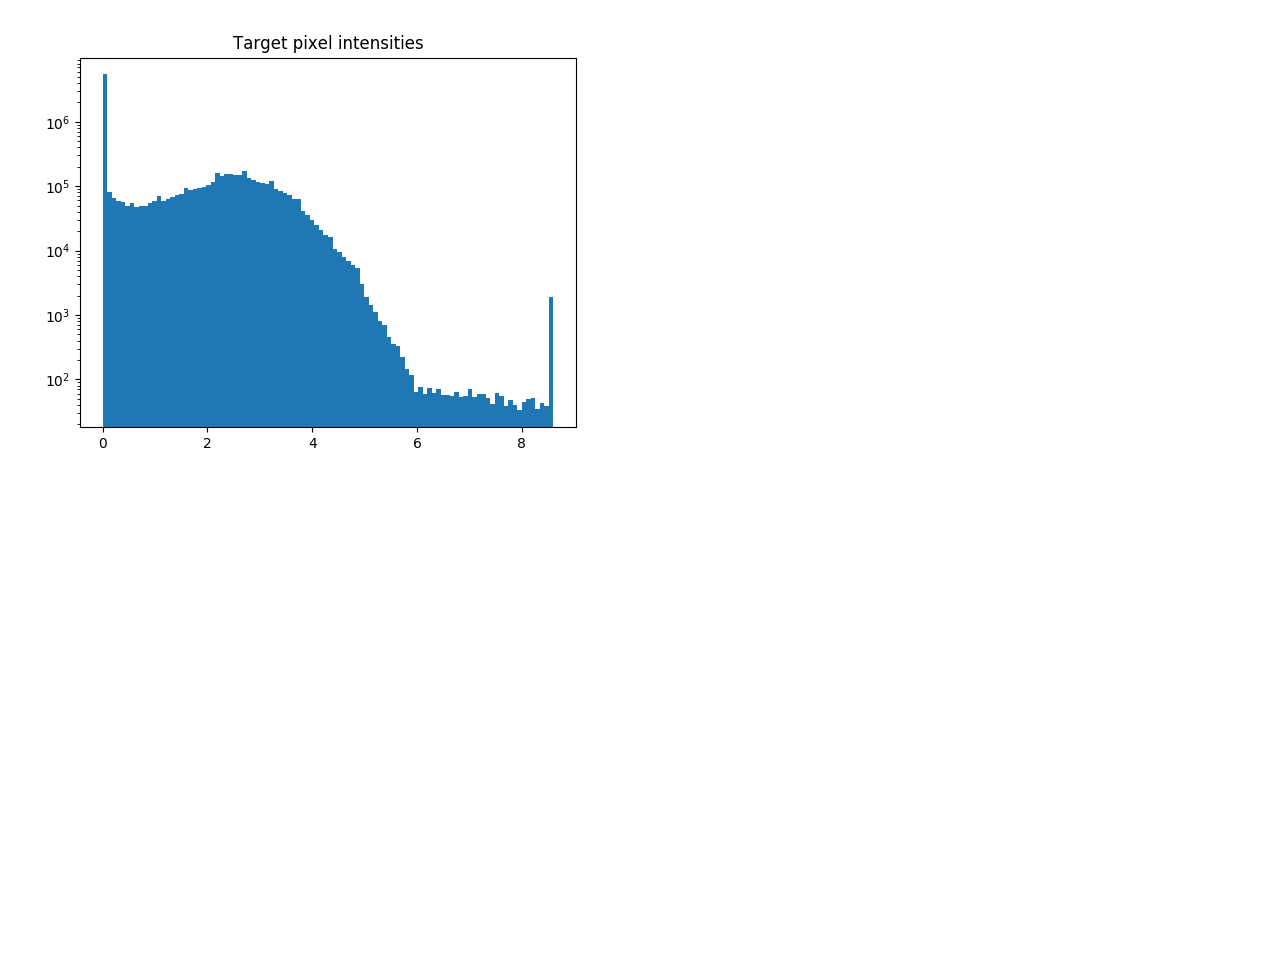

In [9]:
fig,ax = plt.subplots()
ax.hist(J.ravel(),bins=100,log=True)
ax.set_title('Target pixel intensities')
fig.canvas.draw()

In [10]:
# initial downsampling so there isn't so much on the gpu
mindownJ = np.min(np.array(downJs),0)
xJ,J = emlddmm.downsample_image_domain(xJ,J,mindownJ)
W0 = emlddmm.downsample(W0,mindownJ)
downJs = [ list((np.array(d)/mindownJ).astype(int)) for d in downJs]
dJ = [x[1]-x[0] for x in xJ]
print(dJ)
nJ = np.array(J.shape,dtype=int)
# update our config variable
config['downJ'] = downJs

[100.0, 100.0, 100.0]


<IPython.core.display.Javascript object>


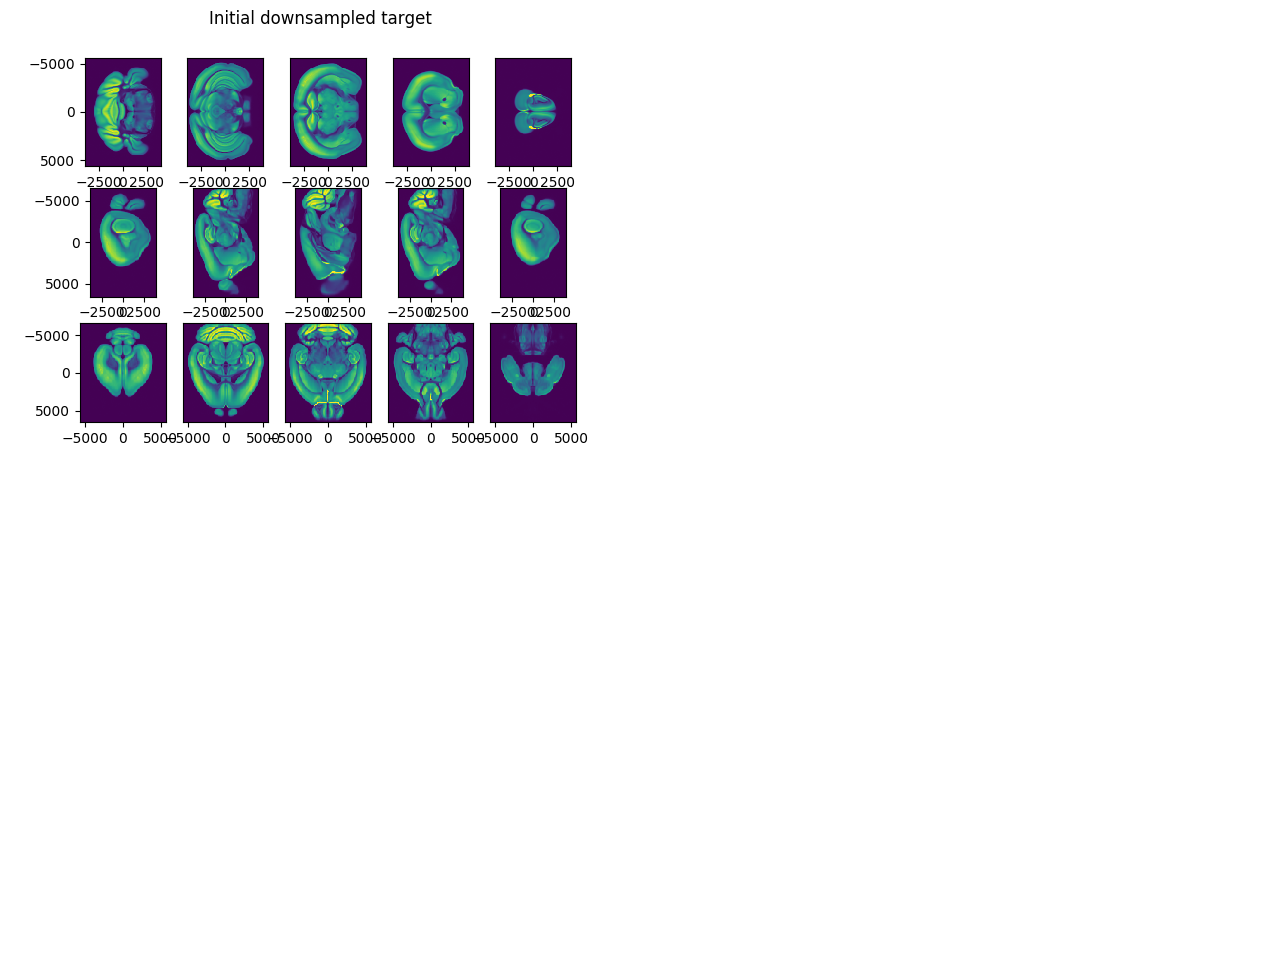

In [11]:
fig = emlddmm.draw(J,xJ)
fig[0].suptitle('Initial downsampled target')
fig[0].canvas.draw()


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


<IPython.core.display.Javascript object>


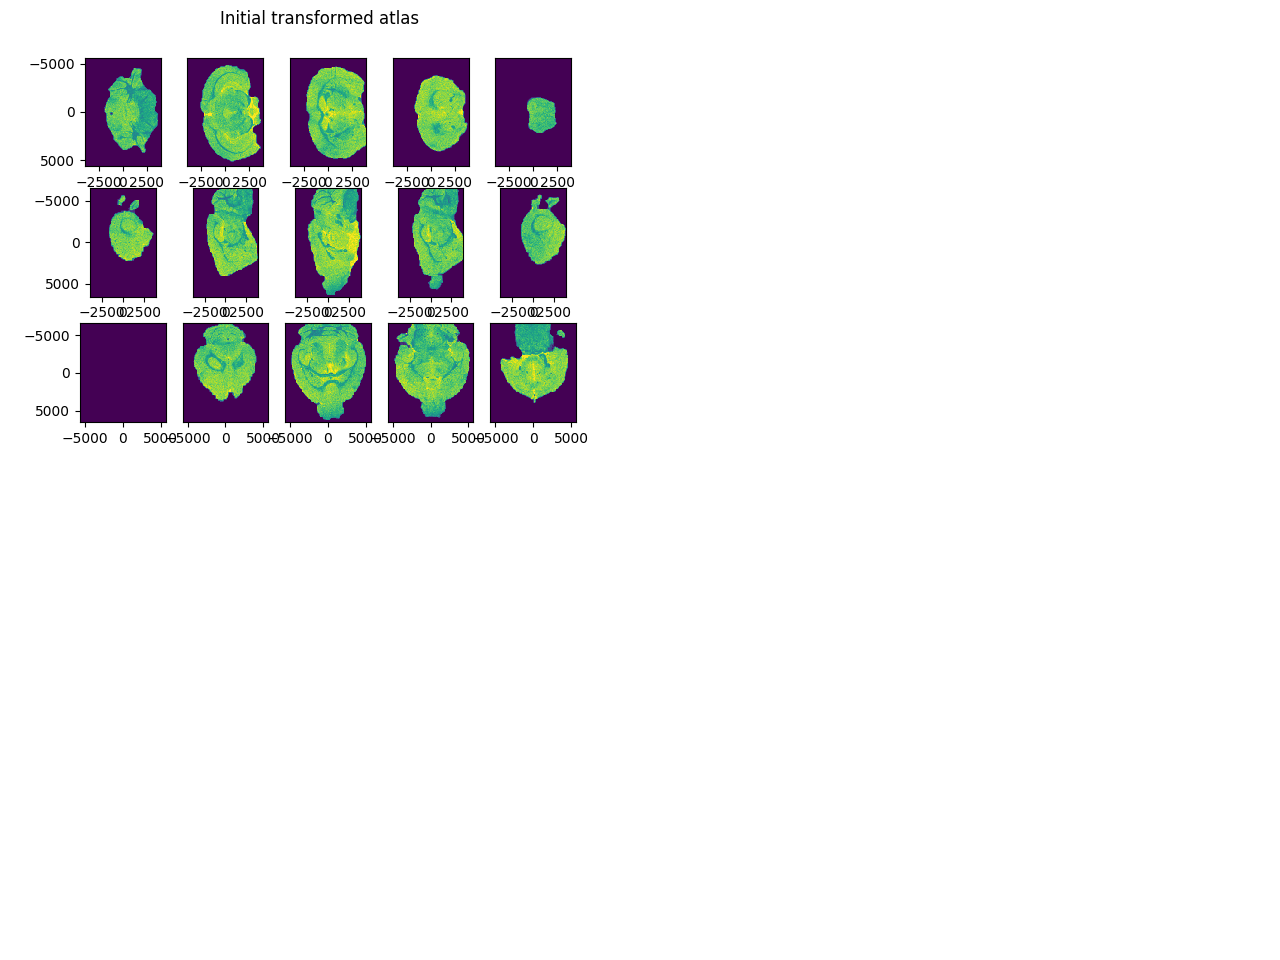

In [12]:
imp.reload(emlddmm)
# visualize initial affine
if 'A' in config:
    A = np.array(config['A']).astype(float)
else:
    A = np.eye(4)    
print(A)

# for simplicity I will add a translation manually 
A[:3,-1] = [-4000,100,4000]
config['A'] = A

# this affine matrix should be 4x4, but it may be 1x4x4
while A.ndim > 2:
    A = A[0]
Ai = np.linalg.inv(A)
XJ = np.stack(np.meshgrid(*xJ,indexing='ij'),-1)
Xs = (Ai[:3,:3]@XJ[...,None])[...,0] + Ai[:3,-1]
out = emlddmm.interp(xI,I,Xs.transpose((3,0,1,2)))
fig = emlddmm.draw(out,xJ)
fig[0].suptitle('Initial transformed atlas')
fig[0].canvas.draw()


Found 2 scales
dv tensor([300., 300., 300.], device='cuda:1')
a scale is 200.0


<IPython.core.display.Javascript object>


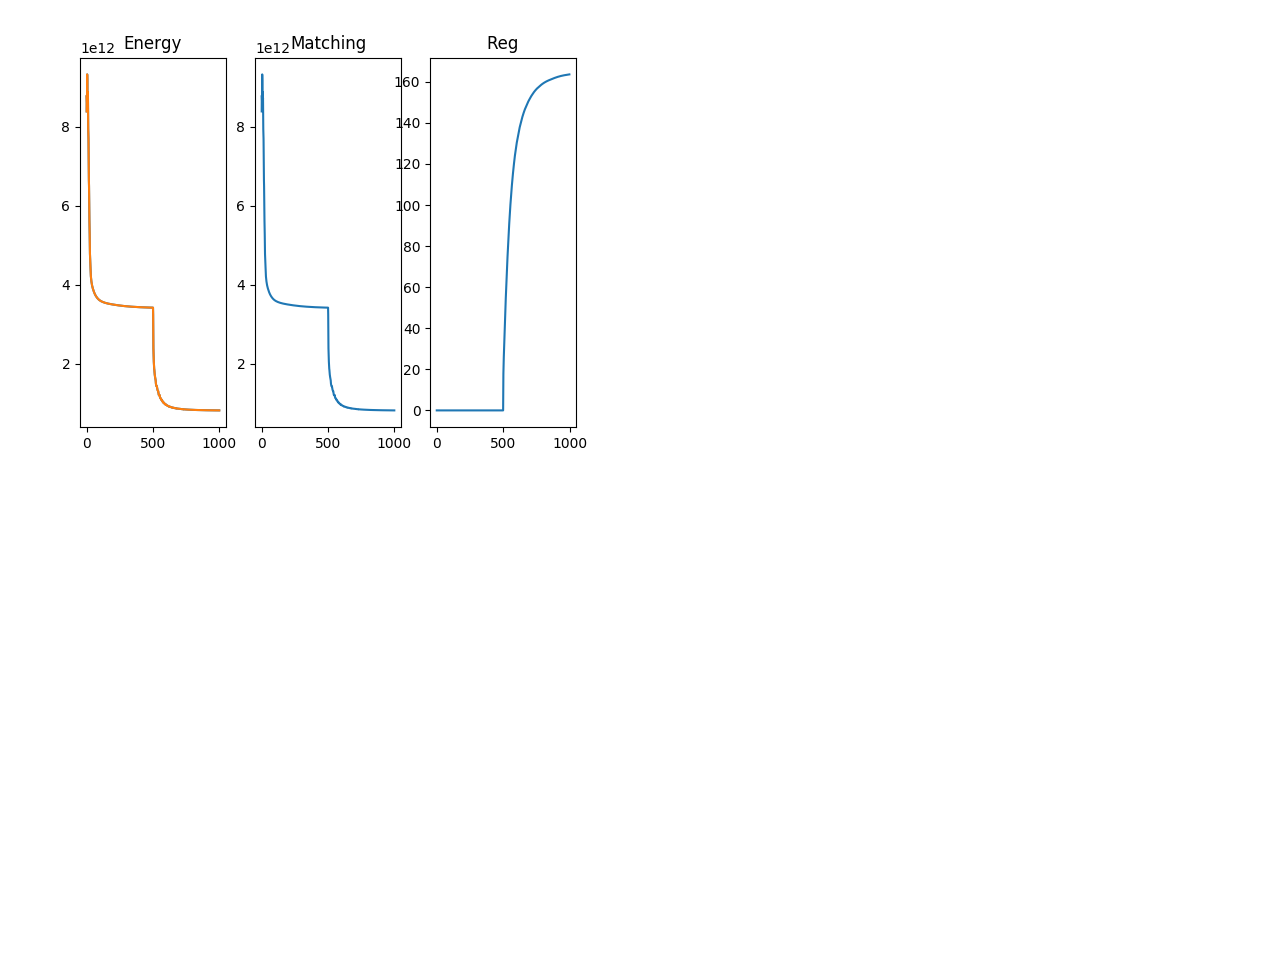

<IPython.core.display.Javascript object>


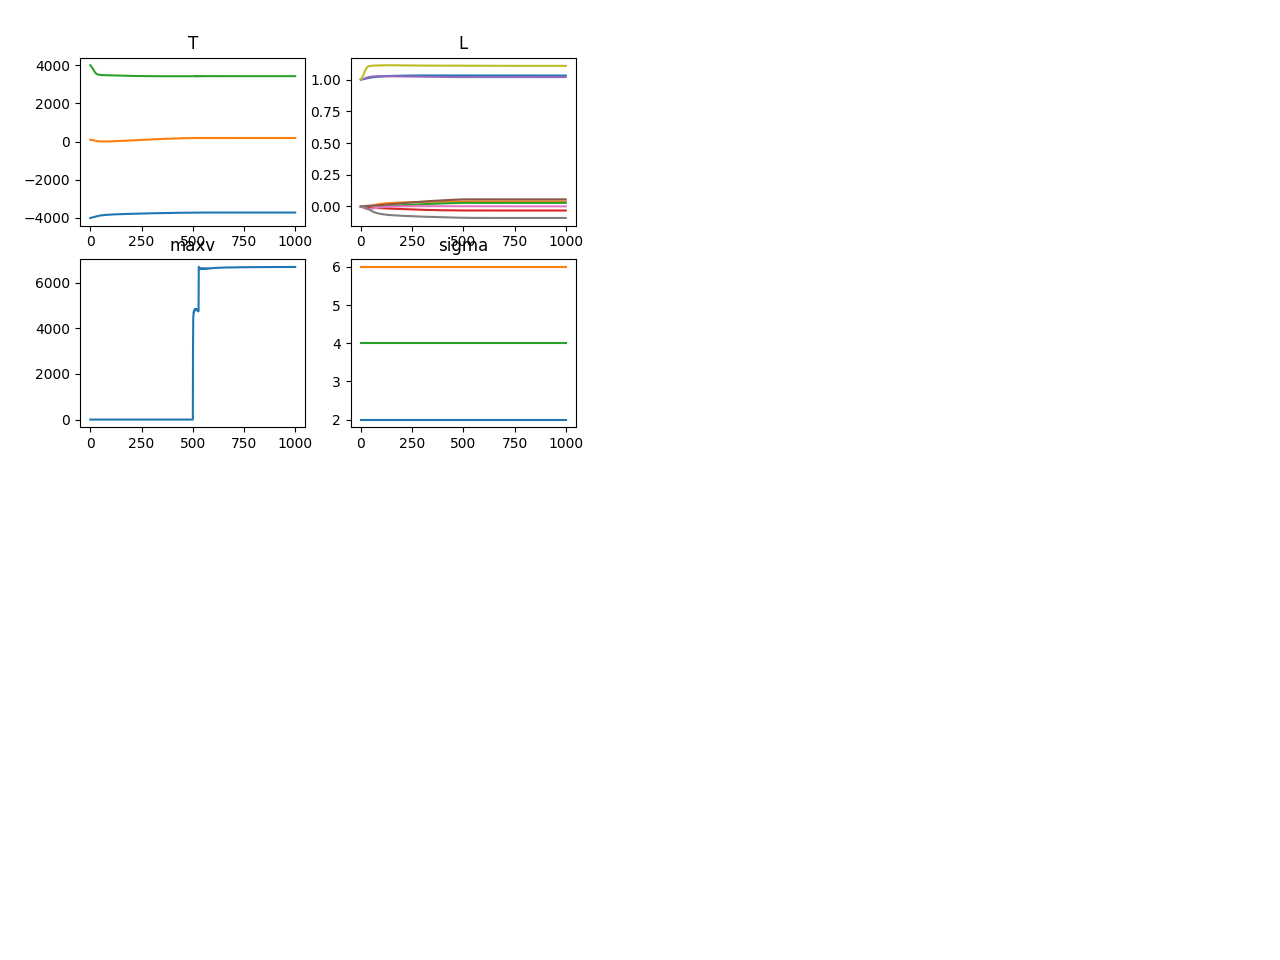

<IPython.core.display.Javascript object>


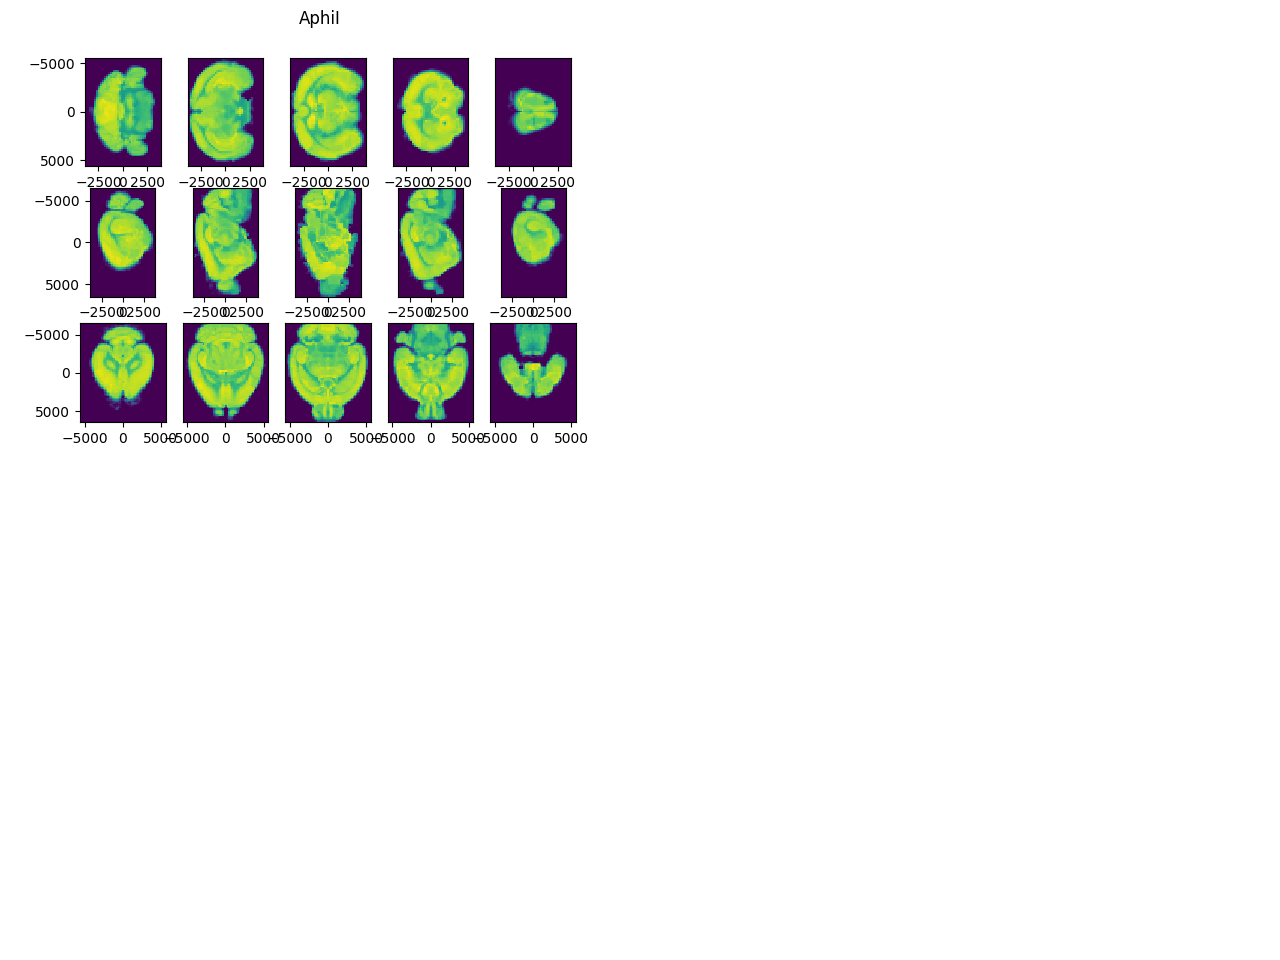

<IPython.core.display.Javascript object>


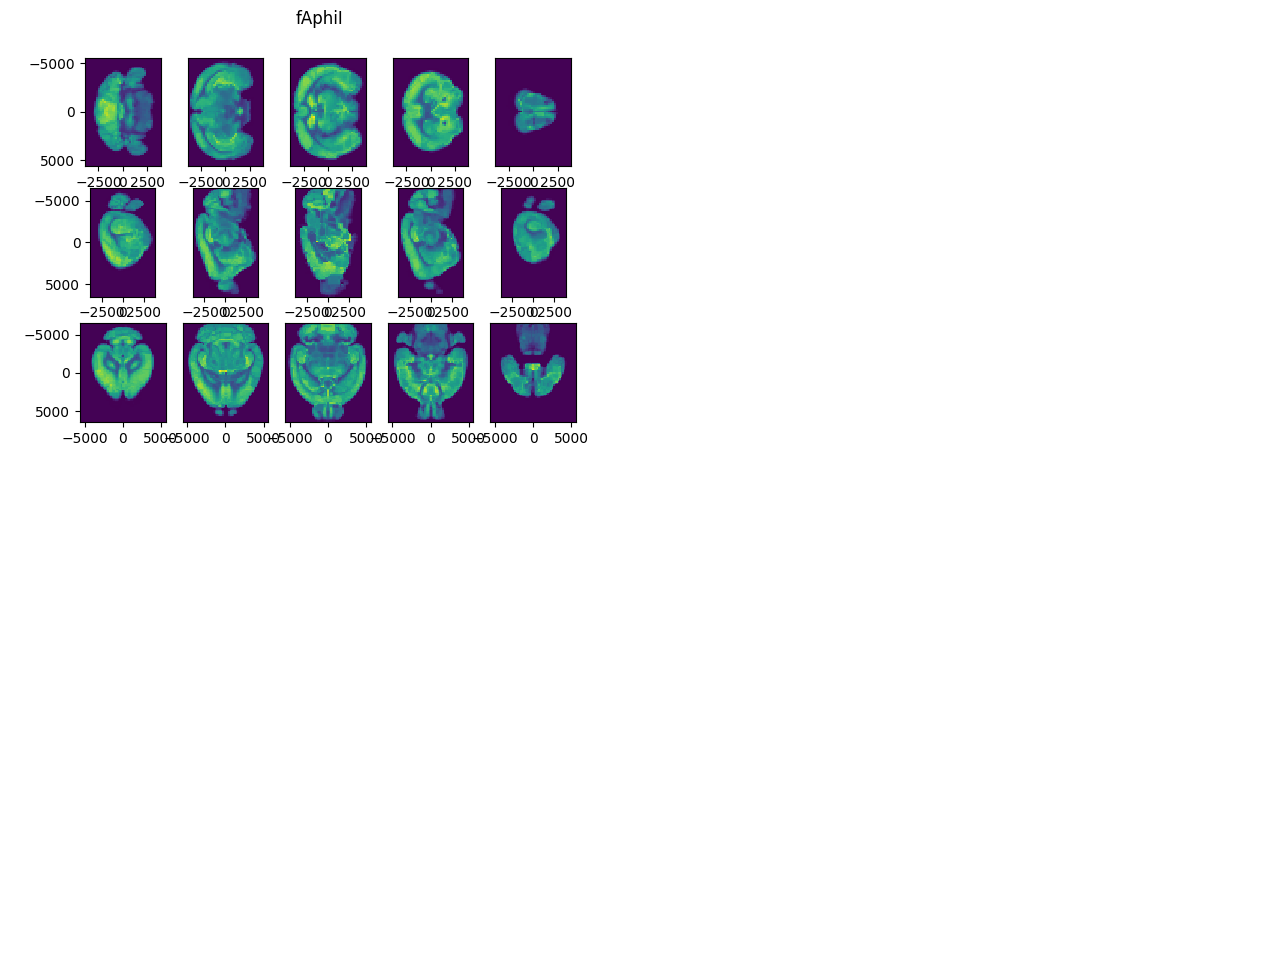

<IPython.core.display.Javascript object>


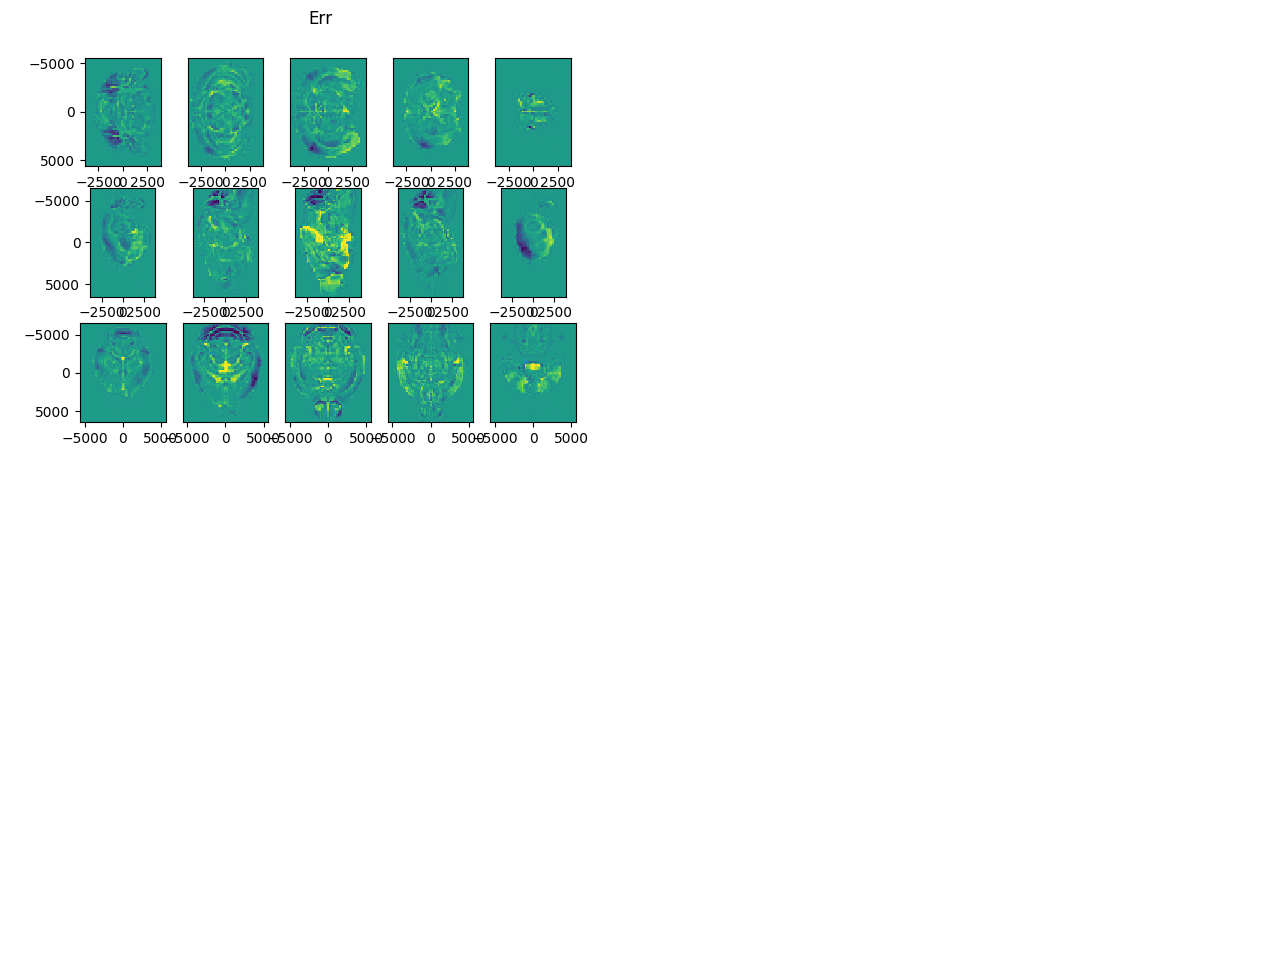

<IPython.core.display.Javascript object>


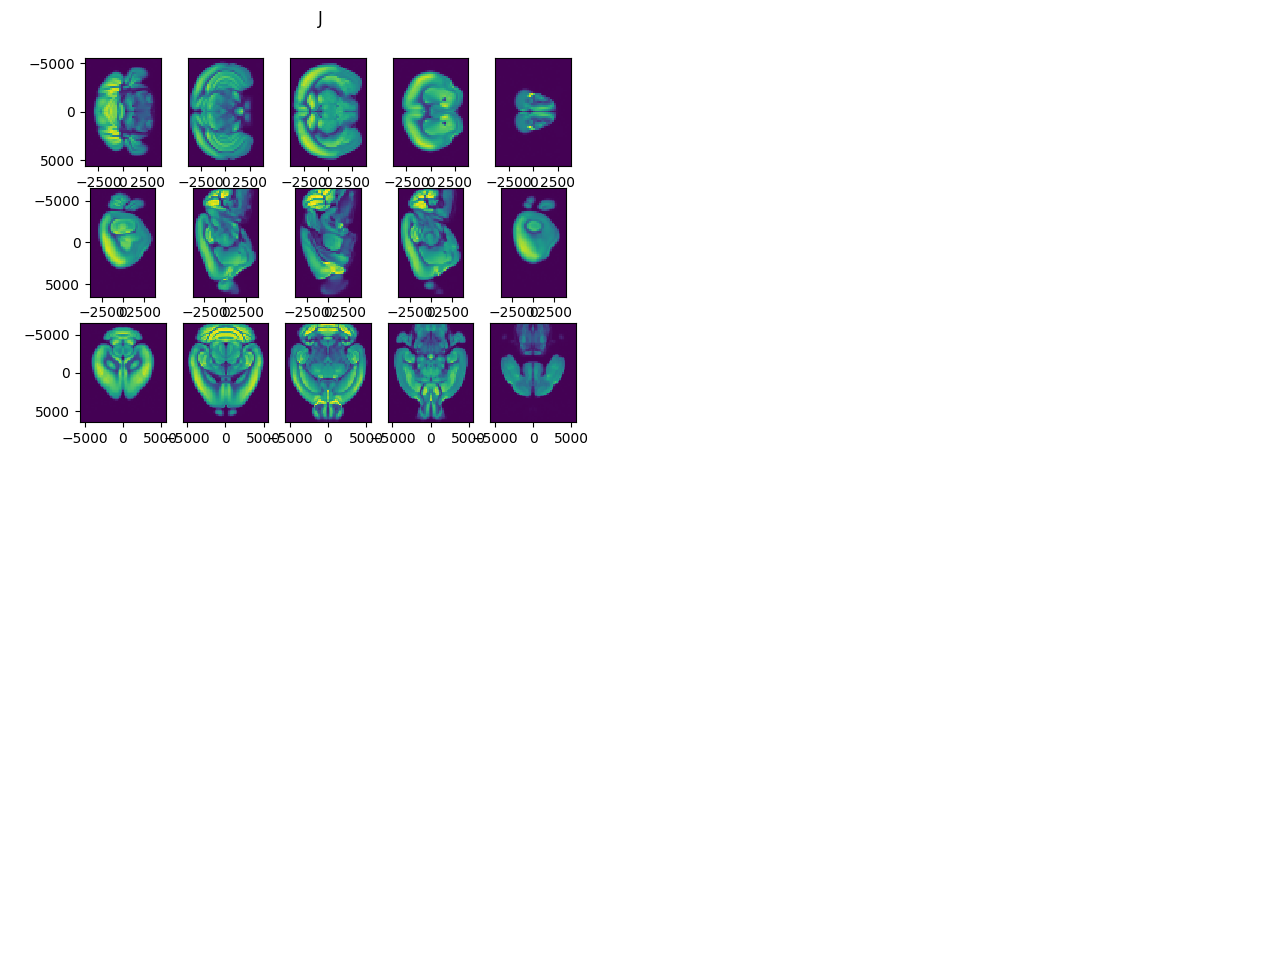

<IPython.core.display.Javascript object>


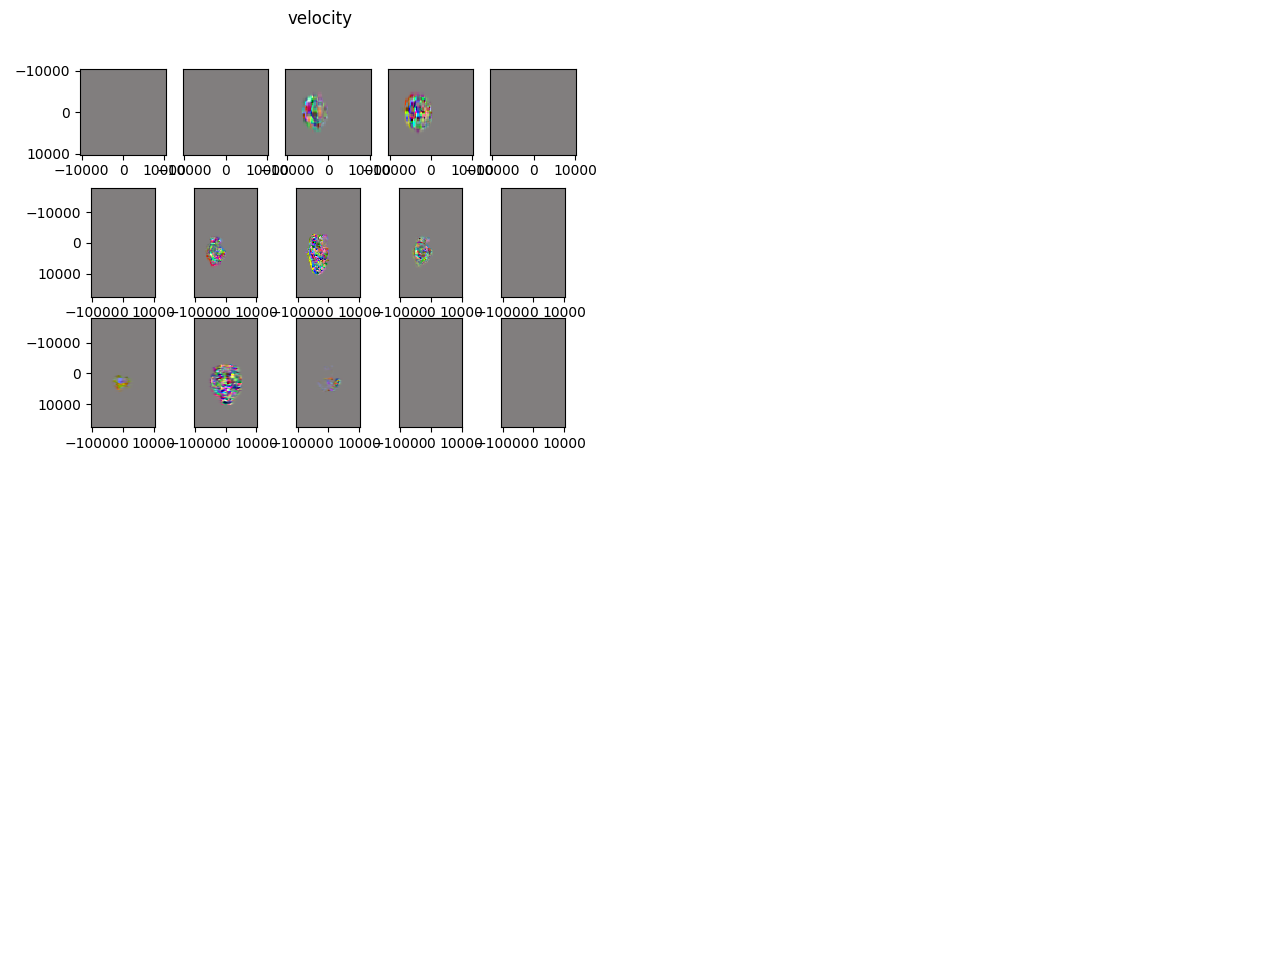

<IPython.core.display.Javascript object>


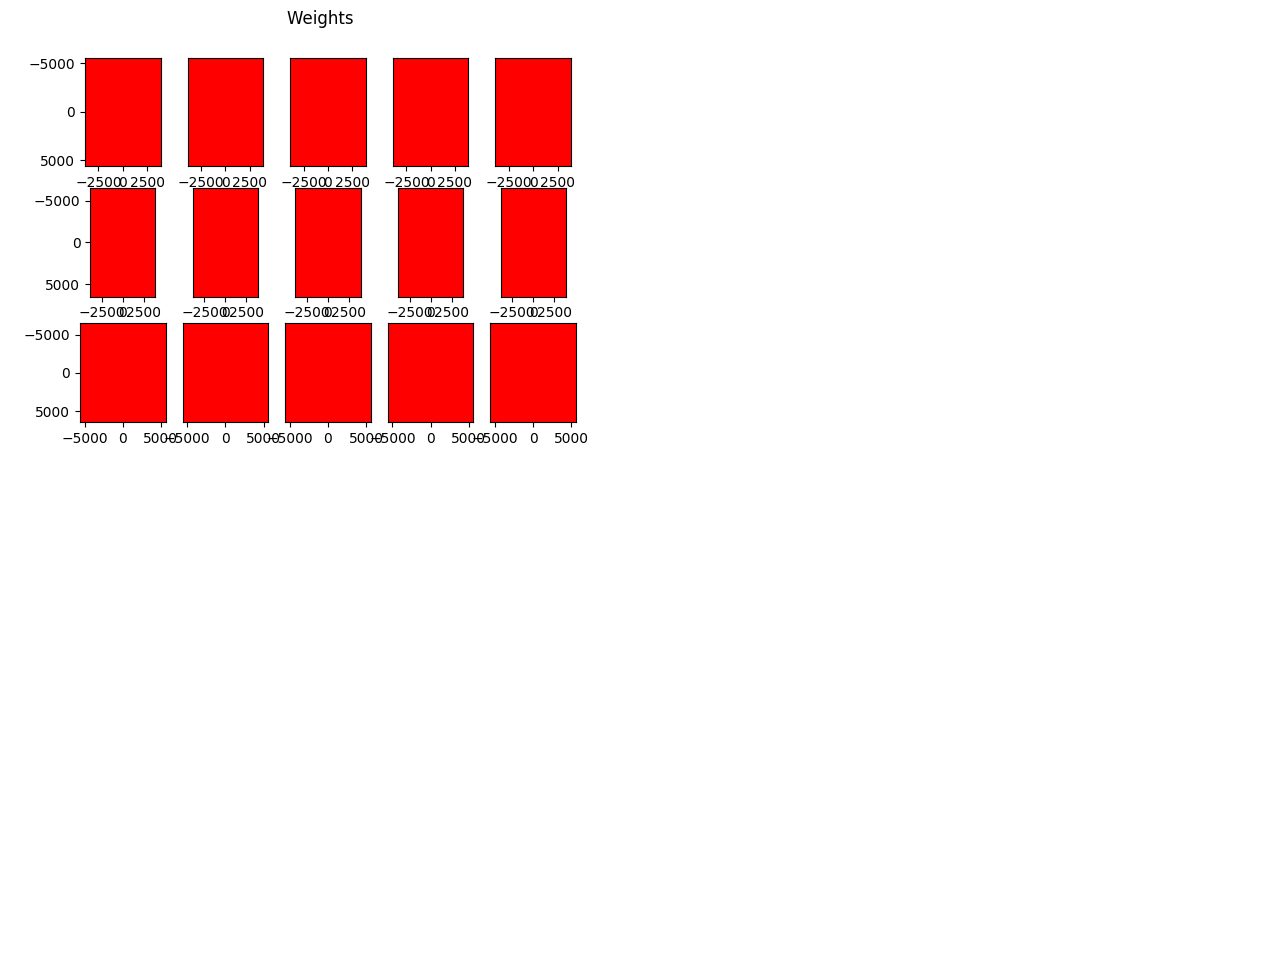

[W Copy.cpp:240] Warning: Casting complex values to real discards the imaginary part (function operator())
/mnt/data/csh_data/emlddmm/emlddmm.py:87: RuntimeWarning: invalid value encountered in true_divide
  J /= (vmax[:,None,None,None] - vmin[:,None,None,None])


Finished iteration 0
Finished iteration 10
Finished iteration 20
Finished iteration 30
Finished iteration 40
Finished iteration 50
Finished iteration 60
Finished iteration 70
Finished iteration 80
Finished iteration 90
Finished iteration 100
Finished iteration 110
Finished iteration 120
Finished iteration 130
Finished iteration 140
Finished iteration 150
Finished iteration 160
Finished iteration 170
Finished iteration 180
Finished iteration 190
Finished iteration 200
Finished iteration 210
Finished iteration 220
Finished iteration 230
Finished iteration 240
Finished iteration 250
Finished iteration 260
Finished iteration 270
Finished iteration 280
Finished iteration 290
Finished iteration 300
Finished iteration 310
Finished iteration 320
Finished iteration 330
Finished iteration 340
Finished iteration 350
Finished iteration 360
Finished iteration 370
Finished iteration 380
Finished iteration 390
Finished iteration 400
Finished iteration 410
Finished iteration 420
Finished iteration 430

<IPython.core.display.Javascript object>


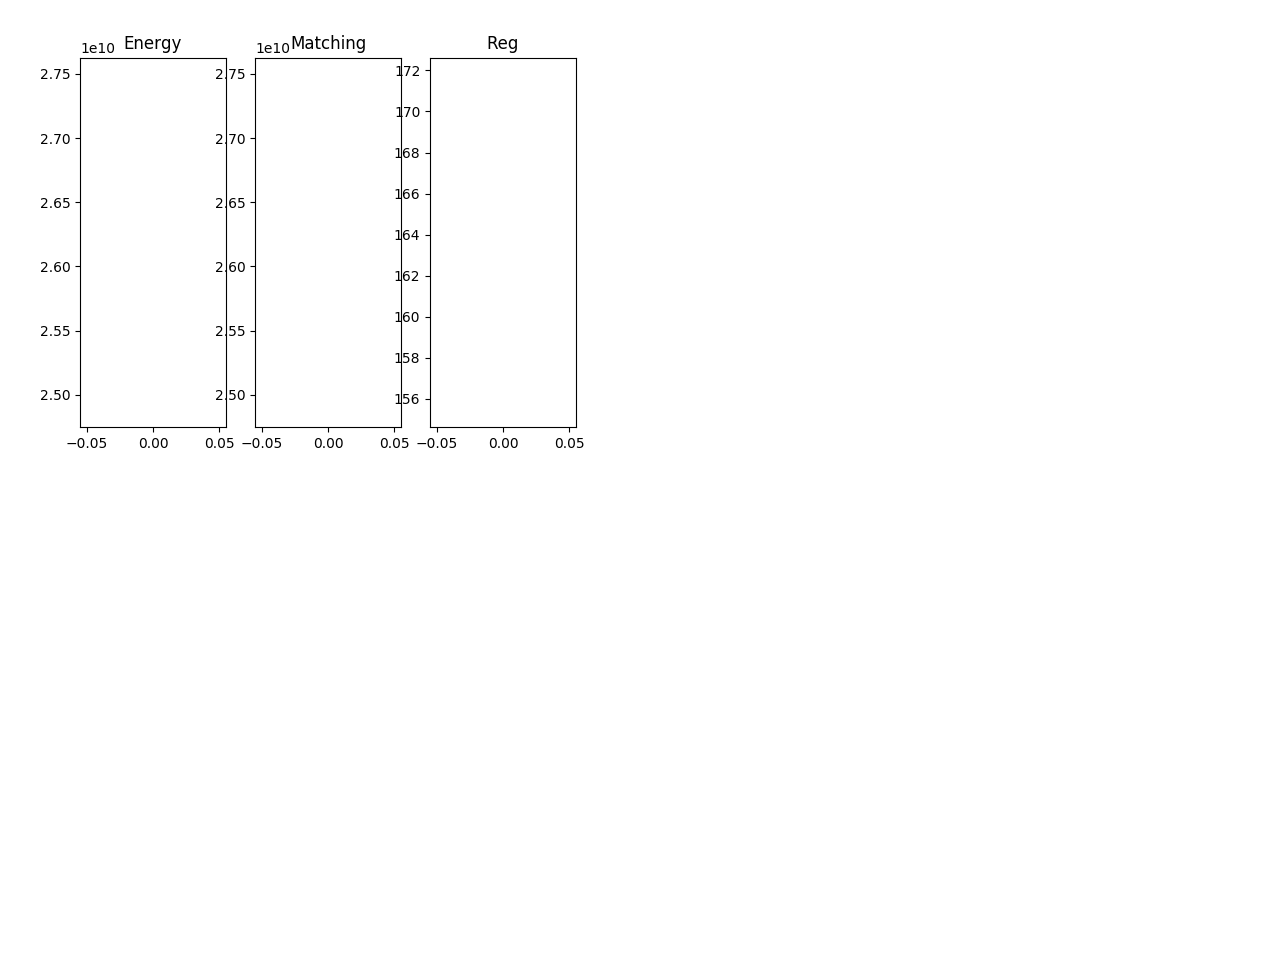

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


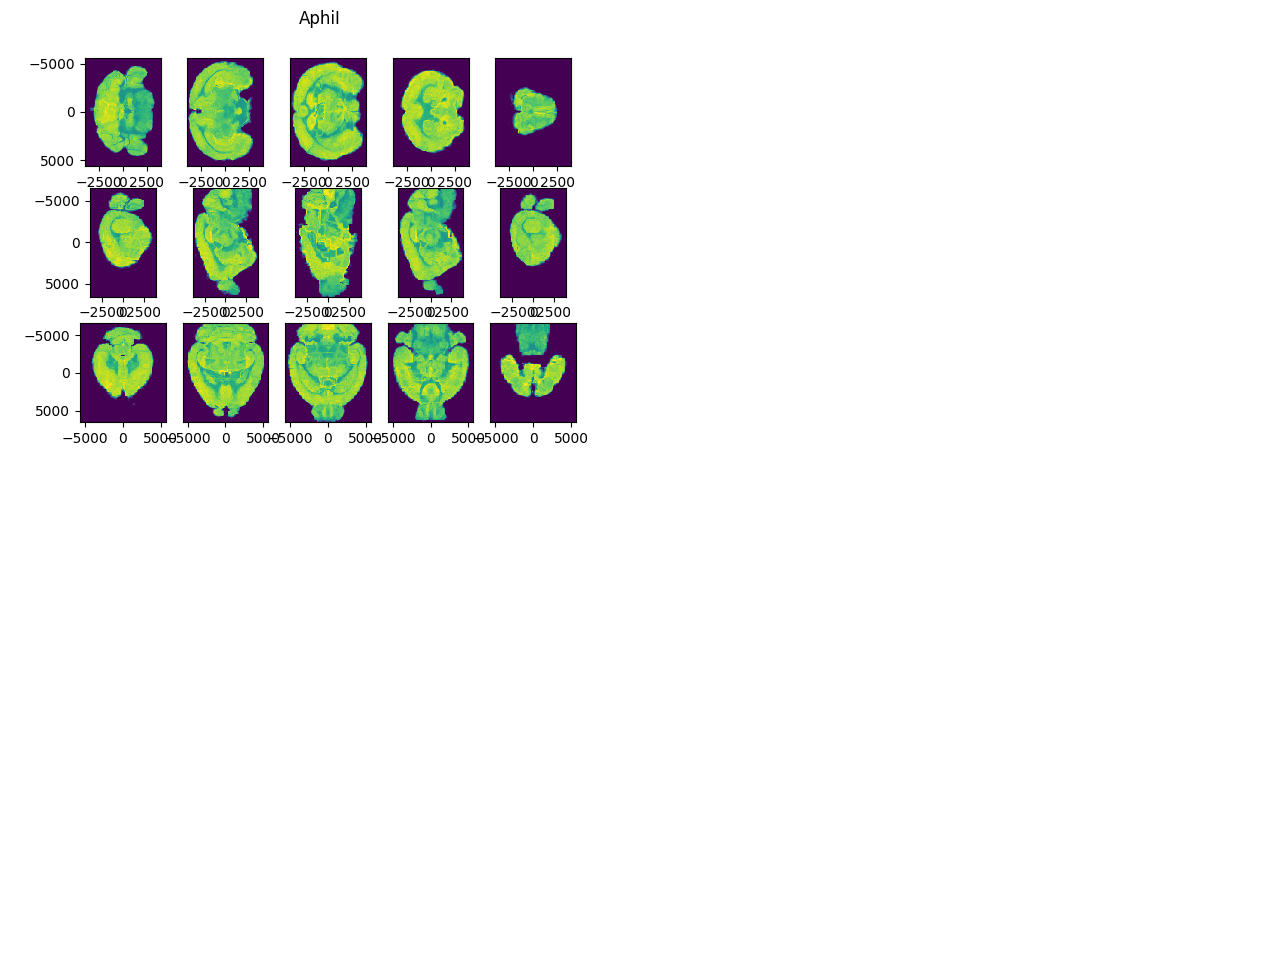

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/mnt/data/csh_data/emlddmm/emlddmm.py:882: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figJ = plt.figure()


<IPython.core.display.Javascript object>

/mnt/data/csh_data/emlddmm/emlddmm.py:883: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figV = plt.figure()


<IPython.core.display.Javascript object>

/mnt/data/csh_data/emlddmm/emlddmm.py:884: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figW = plt.figure()


<IPython.core.display.Javascript object>

In [ ]:
device = 'cuda:1'
#device = 'cpu'
output = emlddmm.emlddmm_multiscale(I=I,xI=[xI],J=J,xJ=[xJ],W0=W0,device=device,**config)

In [ ]:
imp.reload(emlddmm)
emlddmm.write_transform_outputs(output_dir,output[-1])

In [ ]:
imp.reload(emlddmm)
emlddmm.write_qc_outputs(output_dir,output[-1],xI,I,xJ,J,)

In [ ]:
# apply forward transform (target image to atlas)
imp.reload(emlddmm)
Xin = torch.stack(torch.meshgrid([torch.as_tensor(x) for x in xI]))
Xout = emlddmm.compose_sequence(output_dir,Xin)
Jt = emlddmm.apply_transform_float(xJ,J,Xout)

In [ ]:
fig = emlddmm.draw(Jt,xI)
fig[0].suptitle('Transformed target')
fig[0].canvas.draw()

In [ ]:
# apply backward transform (atlas images to target)
Xin = torch.stack(torch.meshgrid([torch.as_tensor(x) for x in xJ]))
Xout = emlddmm.compose_sequence(output_dir,Xin,direction='b')
It = emlddmm.apply_transform_float(xI,I,Xout)

In [ ]:
fig = emlddmm.draw(It,xJ)
fig[0].canvas.draw()


In [ ]:
atlas_output_dir = os.path.join(output_dir,'to_atlas')
if not os.path.isdir(atlas_output_dir): os.mkdir(atlas_output_dir)
target_output_dir = os.path.join(output_dir,'to_target')
if not os.path.isdir(target_output_dir): os.mkdir(target_output_dir)

In [ ]:
# write transformed images, these are at low res
imp.reload(emlddmm)
ext = '.vtk'
if ext[0] != '.': ext = '.' + ext
imp.reload(emlddmm)
emlddmm.write_data(os.path.join(atlas_output_dir,'target_to_atlas'+ext),xI,Jt,'target_to_atlas')

emlddmm.write_data(os.path.join(target_output_dir,'atlas_to_target'+ext),xI,It,'atlas_to_target')

In [ ]:
# reload atlas at full res 
# atlas
imp.reload(emlddmm)
xI,I,title,names = emlddmm.read_data(atlas_name)
I = I.astype(float)
# normalize
I /= np.mean(np.abs(I))
dI = np.array([x[1]-x[0] for x in xI])
print(dI)
fig = emlddmm.draw(I,xI)
fig[0].suptitle('Atlas image')



# transform target images at full res
xJ,J,title,names = emlddmm.read_data(target_name)
J = J.astype(float)
J /= np.mean(np.abs(J))
xJ = [x for x in xJ]
dJ = np.array([x[1]-x[0] for x in xJ])
print(dJ)
J = J.astype(float)#**0.25
fig = emlddmm.draw(J,xJ)
fig[0].suptitle('Target image')
fig[0].canvas.draw()

Xin = torch.stack(torch.meshgrid([torch.as_tensor(x) for x in xI]))
Xout = emlddmm.compose_sequence(output_dir,Xin)
Jt = emlddmm.apply_transform_float(xJ,J,Xout)

fig = emlddmm.draw(Jt,xI)
fig[0].suptitle('Target to atlas')
fig[0].canvas.draw()

# write out
outname = os.path.splitext(os.path.split(target_name)[1])[0]
outname = os.path.join(atlas_output_dir,outname+ext)
emlddmm.write_data(outname,xI,Jt,'target_to_atlas')